<a href="https://colab.research.google.com/github/navgaur/QM1_UGCF/blob/main/Quantum_Mech_1_UGCF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quantum Mechanics 1 for UGCF Quantum Mechanics 1 Lab (DSC paper)**


# Unit - 1
---

## **Visualize the spherical harmonics by plotting the probability density for various values of the quantum numbers (l,m)**

Spherical Harmonics are the solutions of Laplace Equation:

$$∇^2 T (r,\theta, \phi) = 0$$

This eqn can be solved by using method of seperation of variables:
$$T (r,\theta, \phi) = R(r) Θ(\theta) \Phi(\phi) $$

The $\phi$ solution:
$$ \Phi(\phi) = e^{im\phi} ~~, ~~ e^{-im\phi}$$
with $m=0,1,2,3,...$


This will give a radial equation:

$$r^2 \frac{d^2 R}{dr^2} + 2 r \frac{dR}{dr} - \ell (\ell+1) R = 0$$

with the solution:

$$R(r) = r^\ell ~~, ~~  r^{-\ell-1} $$

The $\Theta(\theta)$ solution is in form of Associated Legendre Polynomails

$$ y  = \Theta(\theta) = P_\ell^m(cos\theta)$$
with $m = -\ell, -\ell+1, ...., \ell-1, \ell$, $\ell$ is a non-negative integer.

Traditionally the solution of Laplace Equation in spherical harmonics is written as
$$ Y_\ell^m (\theta,\phi) = \sqrt{ \frac{(2\ell+1)}{4 \pi} \frac{(\ell-m)!}{(\ell + m)!} }
  P_\ell^m (cos\theta) e^{im\phi} $$
  



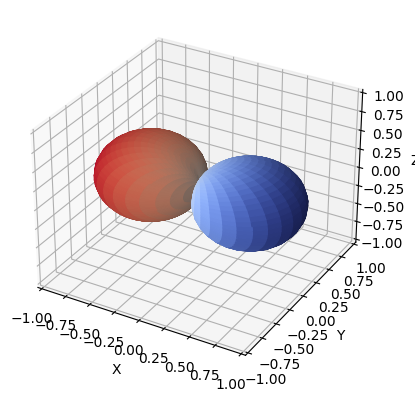

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.special import sph_harm

# resolution - increase this to get a smoother plot
#  at the cost of slower processing
N = 50

# Create matrices of polar, azimuthal angle points to plot
theta = np.linspace(0, np.pi, N)
phi = np.linspace(0, 2*np.pi, N)
theta, phi = np.meshgrid(theta, phi)

# Calculate the spherical harmonic Y(l,m)
# https://en.wikipedia.org/wiki/Table_of_spherical_harmonics
# uncomment one of the lines below to plot that example
# Y(0, 0)
# Yvals = 0.5 * np.sqrt(1 / np.pi) * np.ones(theta.shape)
# Y(1, 1)
Yvals = -0.5 * np.sqrt(1.5 / np.pi) * np.cos(phi) * np.sin(theta)
# Y(2, 2)
#Yvals = 0.25 * np.sqrt(7.5 / np.pi) * np.cos(2 * phi) * np.sin(theta)**2

# Make some adjustments for nice plots
Ymax, Ymin = Yvals.max(), Yvals.min()
if (Ymax != Ymin):
# normalize the values to [1, -1]
    Yvals = 2 * (Yvals - Ymin)/(Ymax - Ymin) - 1
# Use the absolute value of Y(l,m) as the radius
    radii = np.abs(Yvals)
# put the colors in the range [1, 0]
    Ycolors = 0.5 * (Yvals + 1)
else:
# can't normalize b/c Y(0,0) is single-valued
    radii = np.ones(Yvals.shape)
    Ycolors = np.ones(Yvals.shape)

# Compute Cartesian coordinates of the surface
x = radii * np.sin(theta) * np.cos(phi)
y = radii * np.sin(theta) * np.sin(phi)
z = radii * np.cos(theta)

# Do the actual plotting
# negative values will be blue, positive red
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.coolwarm(Ycolors))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
plt.show()

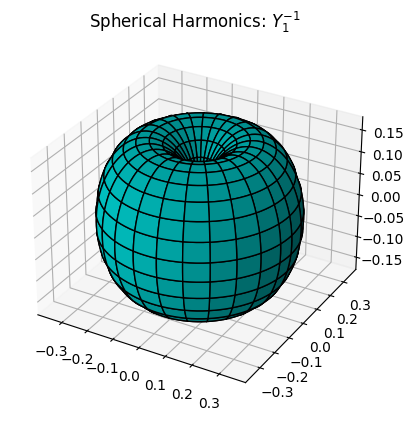

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm

# Parameters for spherical harmonics
l = 1
m = -1

# Create a meshgrid for theta and phi
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2 * np.pi, 100)
theta, phi = np.meshgrid(theta, phi)

# Compute the spherical harmonics
Y_lm = sph_harm(m, l, phi, theta)

# Convert to Cartesian coordinates
x = np.abs(Y_lm) * np.sin(theta) * np.cos(phi)
y = np.abs(Y_lm) * np.sin(theta) * np.sin(phi)
z = np.abs(Y_lm) * np.cos(theta)

# Plot the spherical harmonics
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, rstride=4, cstride=4, color='c', edgecolor='k', alpha=1)
ax.set_title(f'Spherical Harmonics: $Y_{{{l}}}^{{{m}}}$')
plt.show()


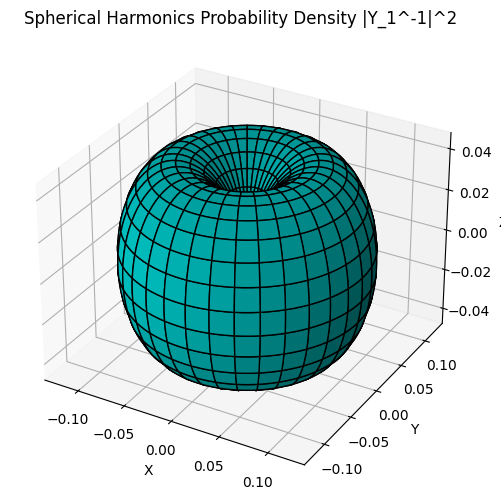

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm

# Define parameters
l = 1
m = -1

theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2 * np.pi, 100)
theta, phi = np.meshgrid(theta, phi)

# Evaluate spherical harmonics
Y_lm = sph_harm(m, l, phi, theta)

# Probability density function
P = np.abs(Y_lm) ** 2

# Convert to Cartesian coordinates for plotting
x = P * np.sin(theta) * np.cos(phi)
y = P * np.sin(theta) * np.sin(phi)
z = P * np.cos(theta)

# Plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, rstride=3, cstride=3, color='c', edgecolor='k', alpha=1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'Spherical Harmonics Probability Density |Y_{l}^{m}|^2')

plt.show()


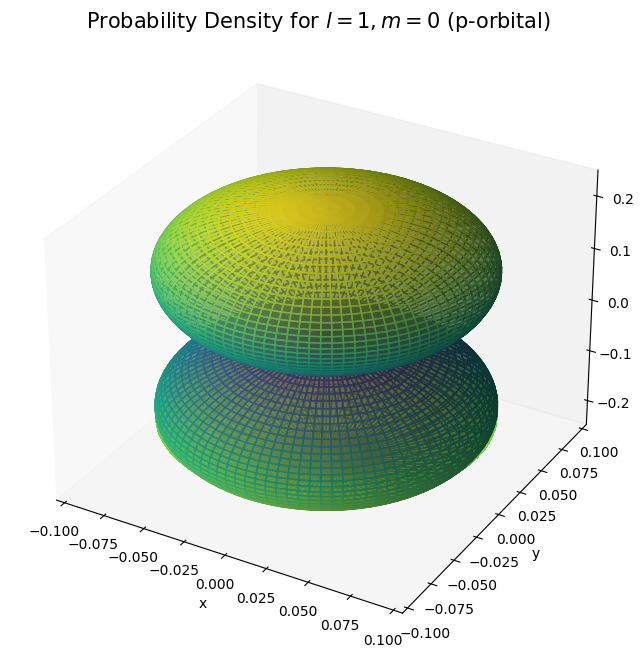

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm

# Define the grid in spherical coordinates
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2 * np.pi, 100)
theta, phi = np.meshgrid(theta, phi)

# Quantum numbers
l = 1
m = 0

# Spherical harmonics
Y_lm = sph_harm(m, l, phi, theta)

# Radial part - assuming R(r) is 1 for simplicity
r = np.abs(Y_lm)**2

# Convert spherical coordinates to Cartesian for plotting
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

# Plotting
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x, y, z, facecolors=plt.cm.viridis(r / r.max()), rstride=1, cstride=1, antialiased=True, alpha=0.5)

# Optional: plot the contour of the probability density
ax.contourf(x, y, z, 50, cmap='viridis', offset=-0.15, alpha=0.9)

# Set plot parameters
ax.set_title(r'Probability Density for $l=1, m=0$ (p-orbital)', fontsize=15)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.grid(False)

plt.show()


---
## **Finite Potential Well**
-  Use the analytical solution for a particle in finite potential well.
-  Numerically solve the transcendental equation one gets after putting the continuity and boundary conditions to determine the energy eigenvalues for various values of the potential width and depth.
-  Plot the corresponding normalised eigen functions


**Wave function** (normalized) :
$$ \psi_n(x) = \sqrt{\frac{2}{a}} sin\left(\frac{n \pi x}{a} \right)$$  

where a = width of the potential well, $V_0$ is the depth of potential well.

<ipython-input-19-e0b2da1d02c9>:13: RuntimeWarning: invalid value encountered in sqrt
  k = np.sqrt(2 * m * E) / hbar
<ipython-input-19-e0b2da1d02c9>:25: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  E = fsolve(equations, E_guess, args=(i, a, m, hbar, V0))


Energy level 1: 0.624 eV
Energy level 2: 0.687 eV


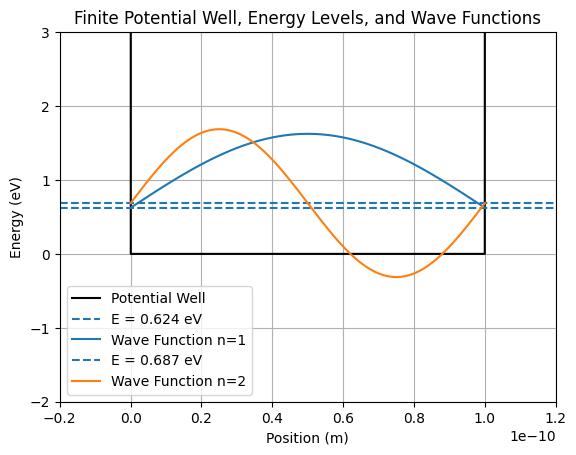

In [ ]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Constants
hbar = 1.0545718e-34  # Reduced Planck's constant (J*s)
m = 9.10938356e-31    # Mass of the electron (kg)
a = 1e-10             # Width of the well (meters)
V0 = 50 * 1.60218e-19 # Depth of the well (Joules) - 50 eV in Joules

# Transcendental equations
def equations(E, n, a, m, hbar, V0):
    k = np.sqrt(2 * m * E) / hbar
    kappa = np.sqrt(2 * m * (V0 - E)) / hbar
    return k * np.tan(k * a) - kappa

# Convert energy to eV for easier interpretation
def energy_to_eV(E):
    return E / 1.60218e-19

# Find energy levels
def find_energy_levels(n, a, m, hbar, V0, E_guess):
    energy_levels = []
    for i in range(1, n + 1):
        E = fsolve(equations, E_guess, args=(i, a, m, hbar, V0))
        energy_levels.append(E[0])
        E_guess = E[0] + 1e-20  # Small increment to find next level
    return energy_levels

# Wave function inside the well
def wave_function(x, n, a):
    k = n * np.pi / a
    return np.sqrt(2 / a) * np.sin(k * x)

# Parameters
n_levels = 2  # Number of energy levels to find
E_guess = 1e-19  # Initial guess for energy (Joules)

# Find the energy levels
energy_levels = find_energy_levels(n_levels, a, m, hbar, V0, E_guess)

# Convert energy levels to eV for display
energy_levels_eV = [energy_to_eV(E) for E in energy_levels]

# Print the energy levels in eV
for i, E in enumerate(energy_levels_eV):
    print(f"Energy level {i + 1}: {E:.3f} eV")

# Plot the potential well and energy levels
x = np.linspace(-0.2e-10, 1.2e-10, 1000)
V = np.piecewise(x, [x < 0, (0 <= x) & (x <= a), x > a], [V0, 0, V0])

plt.plot(x, V / 1.60218e-19, 'k-', label='Potential Well')
for i, E in enumerate(energy_levels):
    plt.axhline(y=energy_to_eV(E), linestyle='--', label=f'E = {energy_to_eV(E):.3f} eV')
    # Plot wave functions
    x_inside = np.linspace(0, a, 1000)
    psi_n = wave_function(x_inside, i + 1, a)
    # Normalize wave function to plot alongside energy levels
    psi_n = psi_n/np.max(np.abs(psi_n))  + energy_to_eV(E)
    plt.plot(x_inside, psi_n, label=f'Wave Function n={i+1}')

plt.xlim(-0.2e-10, 1.2e-10)
#plt.ylim(-5, V0 / 1.60218e-19 + 5)
plt.ylim(-2, 3)
plt.xlabel('Position (m)')
plt.ylabel('Energy (eV)')
plt.title('Finite Potential Well, Energy Levels, and Wave Functions')
plt.legend()
plt.grid(True)
plt.show()
